# Albanian LDA model

This notebook is a simple implementation of the Latent Dirichlet Allocation (LDA) model in Albanian language. The model is trained on the Albanian News dataset, which contains 3 million news articles in Albanian language. The dataset is available on [Kaggle](https://www.kaggle.com/datasets/gentrexha/kosovo-news-articles-dataset/data).

## What is LDA?

Latent Dirichlet Allocation (LDA) is a generative probabilistic model for collections of discrete data such as text corpora. LDA is a three-level hierarchical Bayesian model, in which each item of a collection is modeled as a finite mixture over an underlying set of topics. Each topic is, in turn, modeled as an infinite mixture over an underlying set of topic probabilities. In the context of text corpora, the "items" are documents, where each document is modeled as a mixture of topics, and each topic is modeled as a mixture of words.

## Data Preprocessing

The dataset contains 3 million news articles in Albanian language, which I won't be using all of them due to memory constraints. For this reason the dataset also hasn't been included in this repo. I have used 50 thousand rows of this dataset to train the LDA model. The only column that is of interest is the `content` column.

You can download the dataset from [here](https://www.kaggle.com/datasets/gentrexha/kosovo-news-articles-dataset/data).

In [ ]:
import os

# Check if data folder exists and create it if not
if not os.path.exists('./data'):
	os.makedirs('./data')

if not os.path.exists('./models'):
	os.makedirs('./models')

if not os.path.exists('./models/lda/'):
	os.makedirs('./models/lda/')

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('./data/Kosovo-News-Articles.csv')

# Keep only first 50k rows
df = df.head(50_000)

# Get text data
text_data = df['content'].tolist()

# Create new column with text data
df['content_preprocessed'] = text_data

# Drop old column
df.drop(columns=['content'], inplace=True)

# Save to new file
df.to_csv('./data/Kosovo-News-Articles-50k.csv', index=False)

## Implementation

In [6]:
stopwords_al = ["ë", "të", "i", "më", "që", "në", "një", "a", "për", "sh", "nga", "ka", "u", "është", "dhe", "shih", "nuk", "m", "diçka", "ose", "si", "shumë", "etj", "se", "pa", "sipas", "s", "t", "dikujt", "dikë", "mirë", "vet", "bëj", "ai", "vend", "prej", "ja", "duke", "tjetër", "kur", "ia", "ku", "ta", "keq", "dy", "bën", "bërë", "bëhet", "diçajë", "edhe", "madhë", "la", "sa", "gjatë", "zakonisht", "pas", "vetë", "mbi", "disa", "iu", "mos", "ç", "para", "dikush", "gjë", "bë", "pak", "tek", "farë", "bëri", "po", "bie", "k", "do", "gjithë", "vetë", "mund", "kam", "le", "jo", "bëje", "tij", "kanë", "ishte", "janë", "vjen", "atë", "këtë", "nëpër", "çdo", "na", "marrë", "merr", "mori", "rri", "deri", "b", "kishte", "mban", "përpara", "tyre", "marr", "gjitha", "as", "vetëm", "nën", "herë", "tjera", "tjerët", "drejt", "qenët", "ndonjë", "nëse", "jap", "merret", "rreth", "lloj", "dot", "saj", "nder", "ndërsa", "cila", "vetën", "ma", "ndaj", "mes", "ajo", "cilën", "por", "ndërmjet", "prapa", "mi", "tërë", "jam", "ashtu", "kësaj", "tillë", "behem", "cilat", "kjo", "menjëherë", "ça", "je", "aq", "aty", "pranë", "ato", "pasur", "qenë", "cilin", "tëper", "njëra", "tëj", "krejt", "kush", "bëjnë", "ti", "bënë", "midis", "cili", "endë", "këto", "kemi", "siç", "kryer", "cilit", "atij", "gjithnjë", "andej", "sipër", "sikur", "këtej", "cilës", "ky", "papritur", "ua", "kryesisht", "gjithçka", "pasi", "kryhet", "mjaft", "këtij", "përbashkët", "ata", "atje", "vazhdimisht", "kurrë", "tonë", "kështu", "unë", "sapo", "rrallë", "vetës", "ishin", "afërt", "tjetrën", "këtu", "çfarë", "to", "anës", "jemi", "asaj", "secila", "kundrejt", "këtyre", "pse", "tillë", "mua", "nëpërmjet", "cilet", "ndryshe", "kishin", "ju", "tani", "atyre", "diç", "ynë", "kudo", "sonë", "sepse", "cilave", "kem", "ty", "t'i", "nbsp", "tha", "re", "thë"]

In [ ]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
import multiprocessing
from gensim.utils import simple_preprocess

# Load the preprocessed data
df = pd.read_csv('./data/Kosovo-News-Articles-50k.csv')

# Preprocess the data
def preprocess(text_list):
		text = "".join(text_list)
		return [word for word in simple_preprocess(str(text)) if word not in stopwords_al]

# Apply preprocessing to each article in the dataframe
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: preprocess(eval(x)))

# Create the dictionary and corpus
dictionary = corpora.Dictionary(df['content_preprocessed'])
corpus = [dictionary.doc2bow(text) for text in df['content_preprocessed']]

# Save the dictionary
dictionary.save('./models/lda/dictionary')

# Save the corpus
corpora.MmCorpus.serialize('./models/lda/corpus.mm', corpus)

if __name__ == '__main__':
		num_cores = multiprocessing.cpu_count()

		# Increase the number of topics to capture more complex patterns
		num_topics = 10

		alpha = 'auto'
		eta = 'auto'
		passes = 50

		# Train the LDA model with increased complexity and adjusted hyperparameters
		lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, alpha='auto', passes=passes)

		# Print the topics
		print("Topics:")
		for topic_id, topic in lda_model.print_topics(-1):
				print(f"Topic {topic_id}: {topic}")

		# Save the model
		lda_model.save('./models/lda/lda_model')

		# Save the topics
		with open('./data/topics.txt', 'w') as f:
				for topic_id, topic in lda_model.print_topics(-1):
						f.write(f"Topic {topic_id}: {topic}\n")


In [1]:
from gensim.models import LdaModel

# Load lda_model
lda_model = LdaModel.load('./models/lda/lda_model')

# Get the number of topics in the LDA model
num_topics = lda_model.num_topics

# Get the topic labels
topic_labels = []
for topic_id in range(num_topics):
    topic_words = lda_model.show_topic(topic_id, topn=5)
    topic_label = ', '.join([word for word, _ in topic_words])
    topic_labels.append(topic_label)

print("Topic Labels:")
for topic_id, label in enumerate(topic_labels):
    print(f"Topic {topic_id}: {label}")


Topic Labels:
Topic 0: së, kosovës, thënë, duhet, politike
Topic 1: duhet, apo, jetë, keni, telegrafi
Topic 2: lajmi, net, on, post, instagram
Topic 3: policia, së, policisë, persona, ndodhur
Topic 4: raste, covid, së, numri, shëndetësisë
Topic 5: parë, së, vitin, thënë, ditë
Topic 6: së, kosovës, kosova, duhet, kosovë
Topic 7: së, telegrafi, lajmi, net, parë
Topic 8: së, euro, kosovës, vitin, vitit
Topic 9: së, kosovës, sot, kosovë, prishtinës


In [3]:
# May vary depending on the model, number of topics, and topic words
topic_mapping = {
    0: "Politics, Political Statements",
    1: "Advice, Opinions",
    2: "Social Media, Online News",
    3: "Police, Crime",
    4: "COVID-19, Health",
    5: "Time, Days",
    6: "Kosovo, Politics",
    7: "News, Media",
    8: "Money, Finance",
    9: "Kosovo, Prishtina"
}

In [1]:
from gensim import corpora
from gensim.models import LdaModel
# Load the dictionary
dictionary = corpora.Dictionary.load('./models/lda/dictionary')

# Load the corpus
corpus = corpora.MmCorpus('./models/lda/corpus.mm')

# Load the LDA model
lda_model = LdaModel.load('./models/lda/lda_model')

In [4]:
# Use the topic mapping to interpret the results
def predict_topics(new_text, lda_model, dictionary, topic_mapping):
	# Preprocess the new text
	new_text_preprocessed = preprocess(new_text)
	
	# Convert the preprocessed text into a bag-of-words representation
	new_text_bow = dictionary.doc2bow(new_text_preprocessed)
	
	# Predict the topic distribution for the new text
	topics = lda_model.get_document_topics(new_text_bow)
	
	# Print the predicted topics with their probabilities
	print("Predicted Topics:")
	for topic in topics:
		print(f"Topic {topic[0]}: {topic_mapping[topic[0]]} ({topic[1]:.2f})")
		top_words_for_topic = lda_model.show_topic(topic[0], topn=10)
		print(f"Top words for this topic: {[word for word, _ in top_words_for_topic]}")


In [2]:
from gensim.utils import simple_preprocess

def preprocess(text_list):
		text = "".join(text_list)
		print(text)
		return [word for word in simple_preprocess(str(text)) if word not in stopwords_al]

In [30]:
# Generate Albanian text (example)

political_text = "Kryeministri shqiptar Edi Rama vizitoi Kosovën për të diskutuar çështje të rëndësishme të bashkëpunimit rajonal. Ai u takua me presidentin e Kosovës, Hashim Thaçi, dhe kryeministrin e Kosovës, Albin Kurti. Gjatë takimeve u diskutuan tema të tilla si integrimi evropian, zhvillimi ekonomik dhe siguria rajonale. Kryeministri Rama theksoi rëndësinë e forcimit të lidhjeve midis Shqipërisë dhe Kosovës dhe thellimit të bashkëpunimit në fusha të ndryshme. Presidenti Thaçi dhe kryeministri Kurti mirëpriten vizitën e kryeministrit Rama dhe shprehën gatishmërinë për të punuar së bashku për të avancuar marrëdhëniet midis dy vendeve."

"""
TRANSLATION

Albanian Prime Minister Edi Rama visited Kosovo to discuss important issues of regional cooperation. He met with Kosovo President Hashim Thaci and Kosovo Prime Minister Albin Kurti. Topics such as European integration, economic development and regional security were discussed during the meetings. Prime Minister Rama stressed the importance of strengthening ties between Albania and Kosovo and deepening cooperation in various fields. President Thaçi and Prime Minister Kurti welcomed prime minister Rama's visit and expressed readiness to work together to advance relations between the two countries.
"""


# Predict the topics for the new text
predict_topics(political_text, lda_model, dictionary, topic_mapping)

Kryeministri shqiptar Edi Rama vizitoi Kosovën për të diskutuar çështje të rëndësishme të bashkëpunimit rajonal. Ai u takua me presidentin e Kosovës, Hashim Thaçi, dhe kryeministrin e Kosovës, Albin Kurti. Gjatë takimeve u diskutuan tema të tilla si integrimi evropian, zhvillimi ekonomik dhe siguria rajonale. Kryeministri Rama theksoi rëndësinë e forcimit të lidhjeve midis Shqipërisë dhe Kosovës dhe thellimit të bashkëpunimit në fusha të ndryshme. Presidenti Thaçi dhe kryeministri Kurti mirëpriten vizitën e kryeministrit Rama dhe shprehën gatishmërinë për të punuar së bashku për të avancuar marrëdhëniet midis dy vendeve.
Predicted Topics:
Topic 0: Politics, Political Statements (0.14)
Top words for this topic: ['së', 'kosovës', 'thënë', 'duhet', 'politike', 'ldk', 'kuvendit', 'zgjedhjet', 'kurti', 'thotë']
Topic 6: Kosovo, Politics (0.74)
Top words for this topic: ['së', 'kosovës', 'kosova', 'duhet', 'kosovë', 'serbisë', 'unknown', 'thënë', 'evropian', 'presidenti']
Topic 9: Kosovo, Pr

In [29]:
# Example of Albanian Financial News

banking_text = "Banka Qendrore e Kosovës ka njoftuar se rritja ekonomike në Kosovë ka qenë stabile gjatë vitit të kaluar. Sipas Bankës Qendrore, rritja ekonomike ishte 3.5% në vitin 2020, dhe pritet të jetë 4.2% në vitin 2021. Banka Qendrore ka theksuar se sektori bankar ka qenë stabil gjatë krizës së koronavirusit dhe ka ofruar mbështetje financiare për bizneset dhe qytetarët. Gjithashtu, Banka Qendrore ka njoftuar se ka marrë masa për uljen e normës së interesit dhe rritjen e kredive në vend. Autoritetet financiare kanë thirrur për rritjen e investimeve dhe zhvillimin e sektorit privat për të shtuar rritjen ekonomike dhe siguruar punësimin për qytetarët."

"""
TRANSLATION

The Central Bank of Kosovo has announced that economic growth in Kosovo was stable during the past year. According to the Central Bank, economic growth was 3.5% in 2020, and is expected to be 4.2% in 2021. The Central Bank has emphasized that the banking sector was stable during the coronavirus crisis and provided financial support to businesses and citizens. Additionally, the Central Bank has announced that it has taken measures to lower the interest rate and increase lending in the country. Financial authorities have called for increased investments and the development of the private sector to boost economic growth and ensure employment for citizens.
"""

# Predict the topics for the new text
predict_topics(banking_text, lda_model, dictionary, topic_mapping)

Banka Qendrore e Kosovës ka njoftuar se rritja ekonomike në Kosovë ka qenë stabile gjatë vitit të kaluar. Sipas Bankës Qendrore, rritja ekonomike ishte 3.5% në vitin 2020, dhe pritet të jetë 4.2% në vitin 2021. Banka Qendrore ka theksuar se sektori bankar ka qenë stabil gjatë krizës së koronavirusit dhe ka ofruar mbështetje financiare për bizneset dhe qytetarët. Gjithashtu, Banka Qendrore ka njoftuar se ka marrë masa për uljen e normës së interesit dhe rritjen e kredive në vend. Autoritetet financiare kanë thirrur për rritjen e investimeve dhe zhvillimin e sektorit privat për të shtuar rritjen ekonomike dhe siguruar punësimin për qytetarët.
Predicted Topics:
Topic 4: COVID-19, Health (0.15)
Top words for this topic: ['raste', 'covid', 'së', 'numri', 'shëndetësisë', 'fundit', 'pandemisë', 'reja', 'rasteve', 'persona']
Topic 5: Time, Days (0.02)
Top words for this topic: ['parë', 'së', 'vitin', 'thënë', 'ditë', 'thotë', 'vitit', 'ish', 'kohë', 'kaluar']
Topic 8: Money, Finance (0.81)
Top

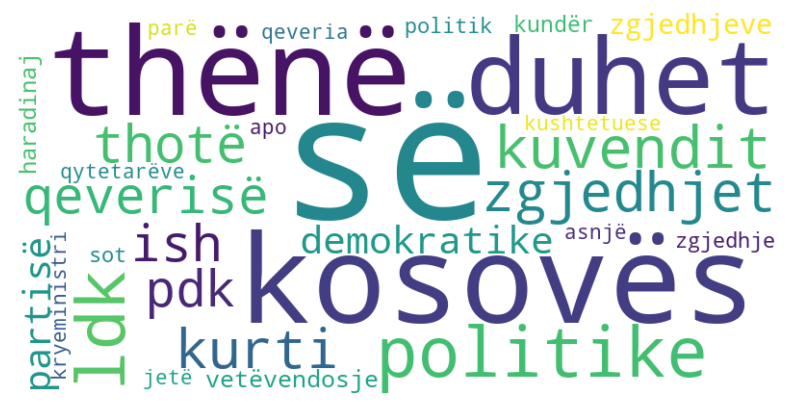

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for a specific topic
topic_id = 0  # Select the topic you want to visualize
words = dict(lda_model.show_topic(topic_id, topn=30))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()